<font size="5">**2. Data Preprocessing**</font>

<font size="4">**2.1 Import Packages**</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot

<font size="4">**2.2 Import Dataset**</font>

In [183]:
data = pd.read_csv("fraud_oracle.csv")

In [26]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


 Split into train, validation and test dataset

In [209]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
split1 = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=5)
for train_index1, test_index1 in split1.split(data, data["FraudFound_P"]):
    fraud_train = data.loc[train_index1]
    fraud_val_test = data.loc[test_index1]

fraud_val_test.reset_index(drop=True, inplace=True)
split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=5)
for train_index2, test_index2 in split2.split(fraud_val_test, fraud_val_test["FraudFound_P"]):
    fraud_val = fraud_val_test.loc[train_index2]
    fraud_test = fraud_val_test.loc[test_index2]

In [210]:
#final split dataframes
fraud_train.reset_index(drop=True, inplace=True) 
fraud_val.reset_index(drop=True, inplace=True) 
fraud_test.reset_index(drop=True, inplace=True)

In [211]:
data_train = fraud_train.copy()
data_val=fraud_val.copy()
data_test=fraud_test.copy()

<font size="4">**2.3 Data Preprocessing**</font>

<font size="3.5">**2.3.1 Drop Irrelevant Columns**</font>

In [212]:
data = data.drop(columns=['PolicyNumber','RepNumber','Year'])

In [152]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision


<font size="3.5">**2.3.2 Fill in Missing Values**</font>

In [153]:
data.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
BasePolicy              0
dtype: int64

There is no missing value in our dataset

But as we see from the data exploration part:
DayOfWeekClaimed - contains a 0 instead of a day of the week
MonthClaimed - contains a 0 instead of the month
Age - contains a 0 instead of the necessary age
So we will deal with these issues now.

In [156]:
#Investigate the 0 in DayOfWeekClaimed and MonthClaimed
print('DayOfWeekClaimed has ', len(data.loc[(data['DayOfWeekClaimed']=='0')]), ' row(s) with a 0')
print('MonthClaimed has ',len(data.loc[(data['MonthClaimed']=='0')]),' row(s) with a 0') 
print(' ')

DayOfWeekClaimed has  0  row(s) with a 0
MonthClaimed has  0  row(s) with a 0
 


In [213]:
#Since both DayOfWeekClaimed and MonthClaimed are 0 for the same entry, I will drop
data = data.loc[data['DayOfWeekClaimed']!='0']

In [69]:
#how many rows where the feature Age is assigned a zero, 
print(len(data[data['Age']==0]))

219


In [214]:
data.loc[data['Age']==0, 'AgeOfPolicyHolder']
#every row with Age=0, has a Policy Holder that is aged between 16 and 17 years.

7        16 to 17
13       16 to 17
28       16 to 17
31       16 to 17
58       16 to 17
           ...   
15243    16 to 17
15262    16 to 17
15274    16 to 17
15379    16 to 17
15392    16 to 17
Name: AgeOfPolicyHolder, Length: 319, dtype: object

In [215]:
#does the comparision of value for age to the value of the AgeOfPolicyHolder
groupings = []
for holder in data['AgeOfPolicyHolder']:
    if 'to' in holder :
        temp = holder.split()
        nr=[int(temp[0]),int(temp[2])]
        groupings.append(nr)
    else :
        temp = holder.split()
        nr = [int(temp[1]),129]
        groupings.append(nr)
                        
age_idx = []
rw_idx = []

In [216]:
#Assigns an age of 16.5 to all rows with missing Age values
data_age0_idx = (data['Age']==0)
data.loc[list(data_age0_idx),'Age']=16.5

<font size="4">**2.4 Variable Correlation**</font>

In [73]:
corr = data.corr()['FraudFound_P'].sort_values()

print('Top 10 - Positive Correlations:')
print('-----------------------------------')
print(corr.tail(10))
print('\nTop 10 - Negative Correlations:')
print('------------------------------')
print(corr.head(10))

Top 10 - Positive Correlations:
-----------------------------------
Age                  -0.024322
WeekOfMonth          -0.014967
WeekOfMonthClaimed   -0.013556
DriverRating          0.006239
Deductible            0.027998
FraudFound_P          1.000000
Name: FraudFound_P, dtype: float64

Top 10 - Negative Correlations:
------------------------------
Age                  -0.024322
WeekOfMonth          -0.014967
WeekOfMonthClaimed   -0.013556
DriverRating          0.006239
Deductible            0.027998
FraudFound_P          1.000000
Name: FraudFound_P, dtype: float64


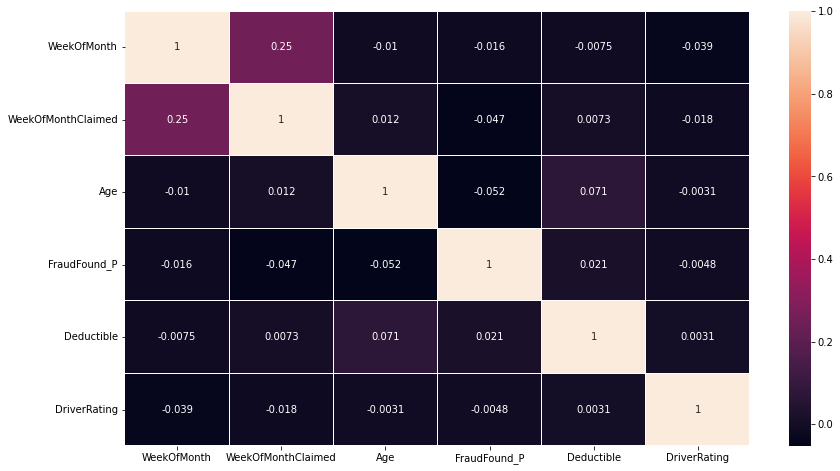

In [9]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),annot = True,  linewidths=.05) 

<font size="3.5">**Insights**</font><br>We consider variables are highly correlated when > 0.80 :<br>
--> there is no high correlation between variables

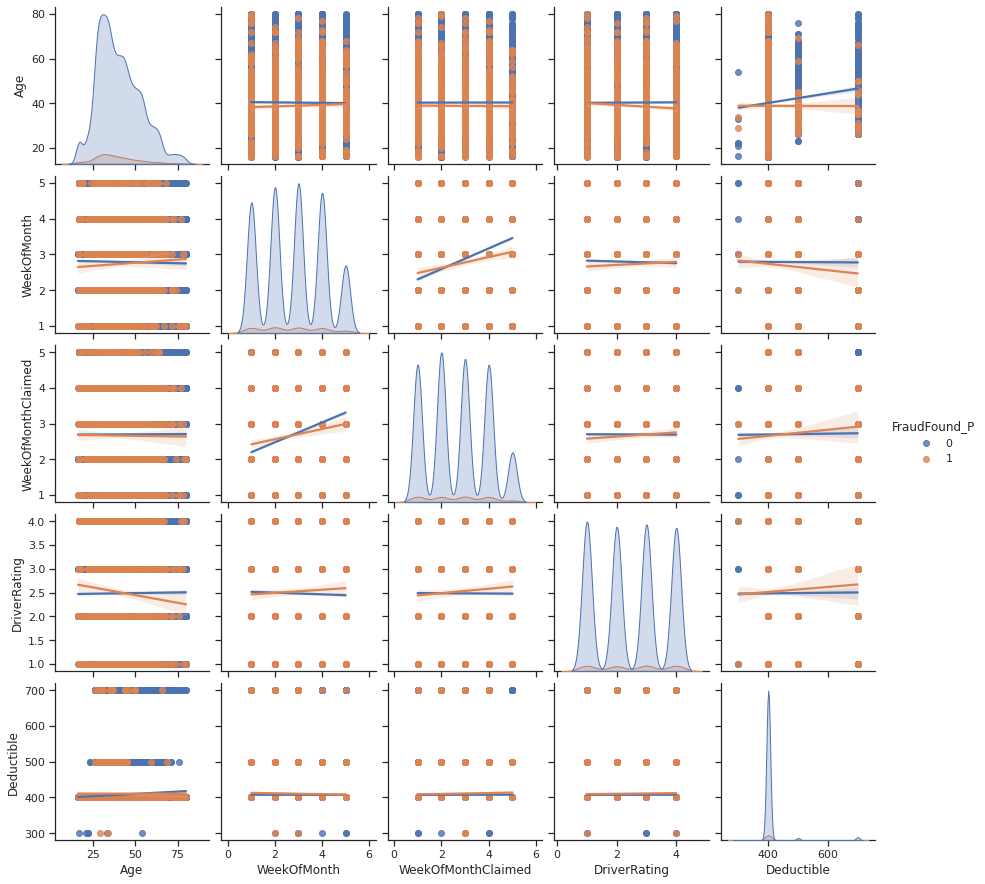

In [39]:
sns.set(style="ticks")

vars= ["Age", "WeekOfMonth", "WeekOfMonthClaimed","DriverRating","Deductible"]

p = pairplot(data, vars=vars, hue="FraudFound_P", kind="reg")

<font size="4">**2.5.1 Specific data types of Columns**</font>

Text(0, 0.5, 'Data type')

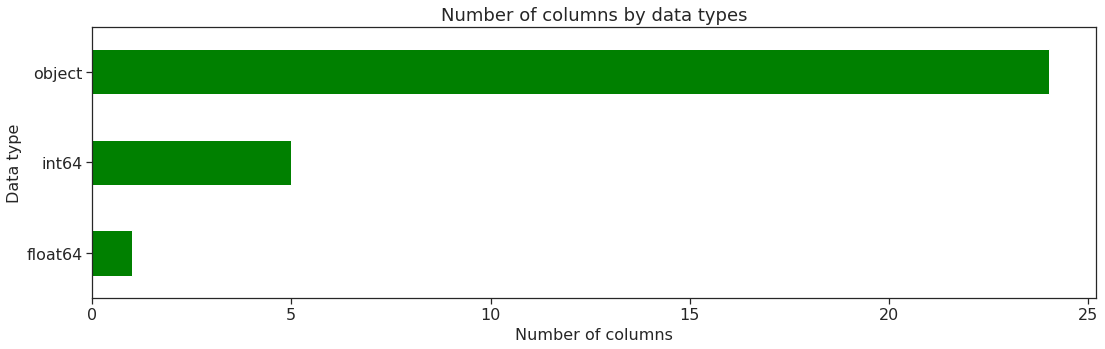

In [40]:
data.dtypes.value_counts().sort_values().plot(kind='barh',
                                            figsize=(18, 5),
                                            fontsize=16,
                                           color="green")

plt.title('Number of columns by data types', fontsize=18)
plt.xlabel('Number of columns', fontsize=16)
plt.ylabel('Data type', fontsize=16)

<font size="4">**2.5.2 Number of Categories for each object data**</font>

In [41]:
data.select_dtypes('object').apply(pd.Series.nunique, axis=0)

Month                   12
DayOfWeek                7
Make                    19
AccidentArea             2
DayOfWeekClaimed         7
MonthClaimed            12
Sex                      2
MaritalStatus            4
Fault                    2
PolicyType               9
VehicleCategory          3
VehiclePrice             6
Days_Policy_Accident     5
Days_Policy_Claim        3
PastNumberOfClaims       4
AgeOfVehicle             8
AgeOfPolicyHolder        9
PoliceReportFiled        2
WitnessPresent           2
AgentType                2
NumberOfSuppliments      4
AddressChange_Claim      5
NumberOfCars             5
BasePolicy               3
dtype: int64

<font size="4">**2.5.3 Visualize Distribution of Categorical Variables**</font>

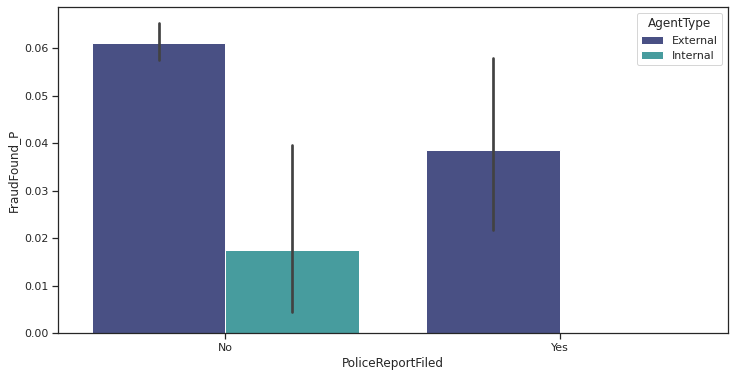

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x="PoliceReportFiled", y= "FraudFound_P", hue="AgentType", data=data,palette='mako')

<font size="3.5">**Insights**</font><br>There is no filed policy report for those who buy auto insurance through internal agent.

Text(0.5, 1.0, 'Number of claim applications are fraudulent')

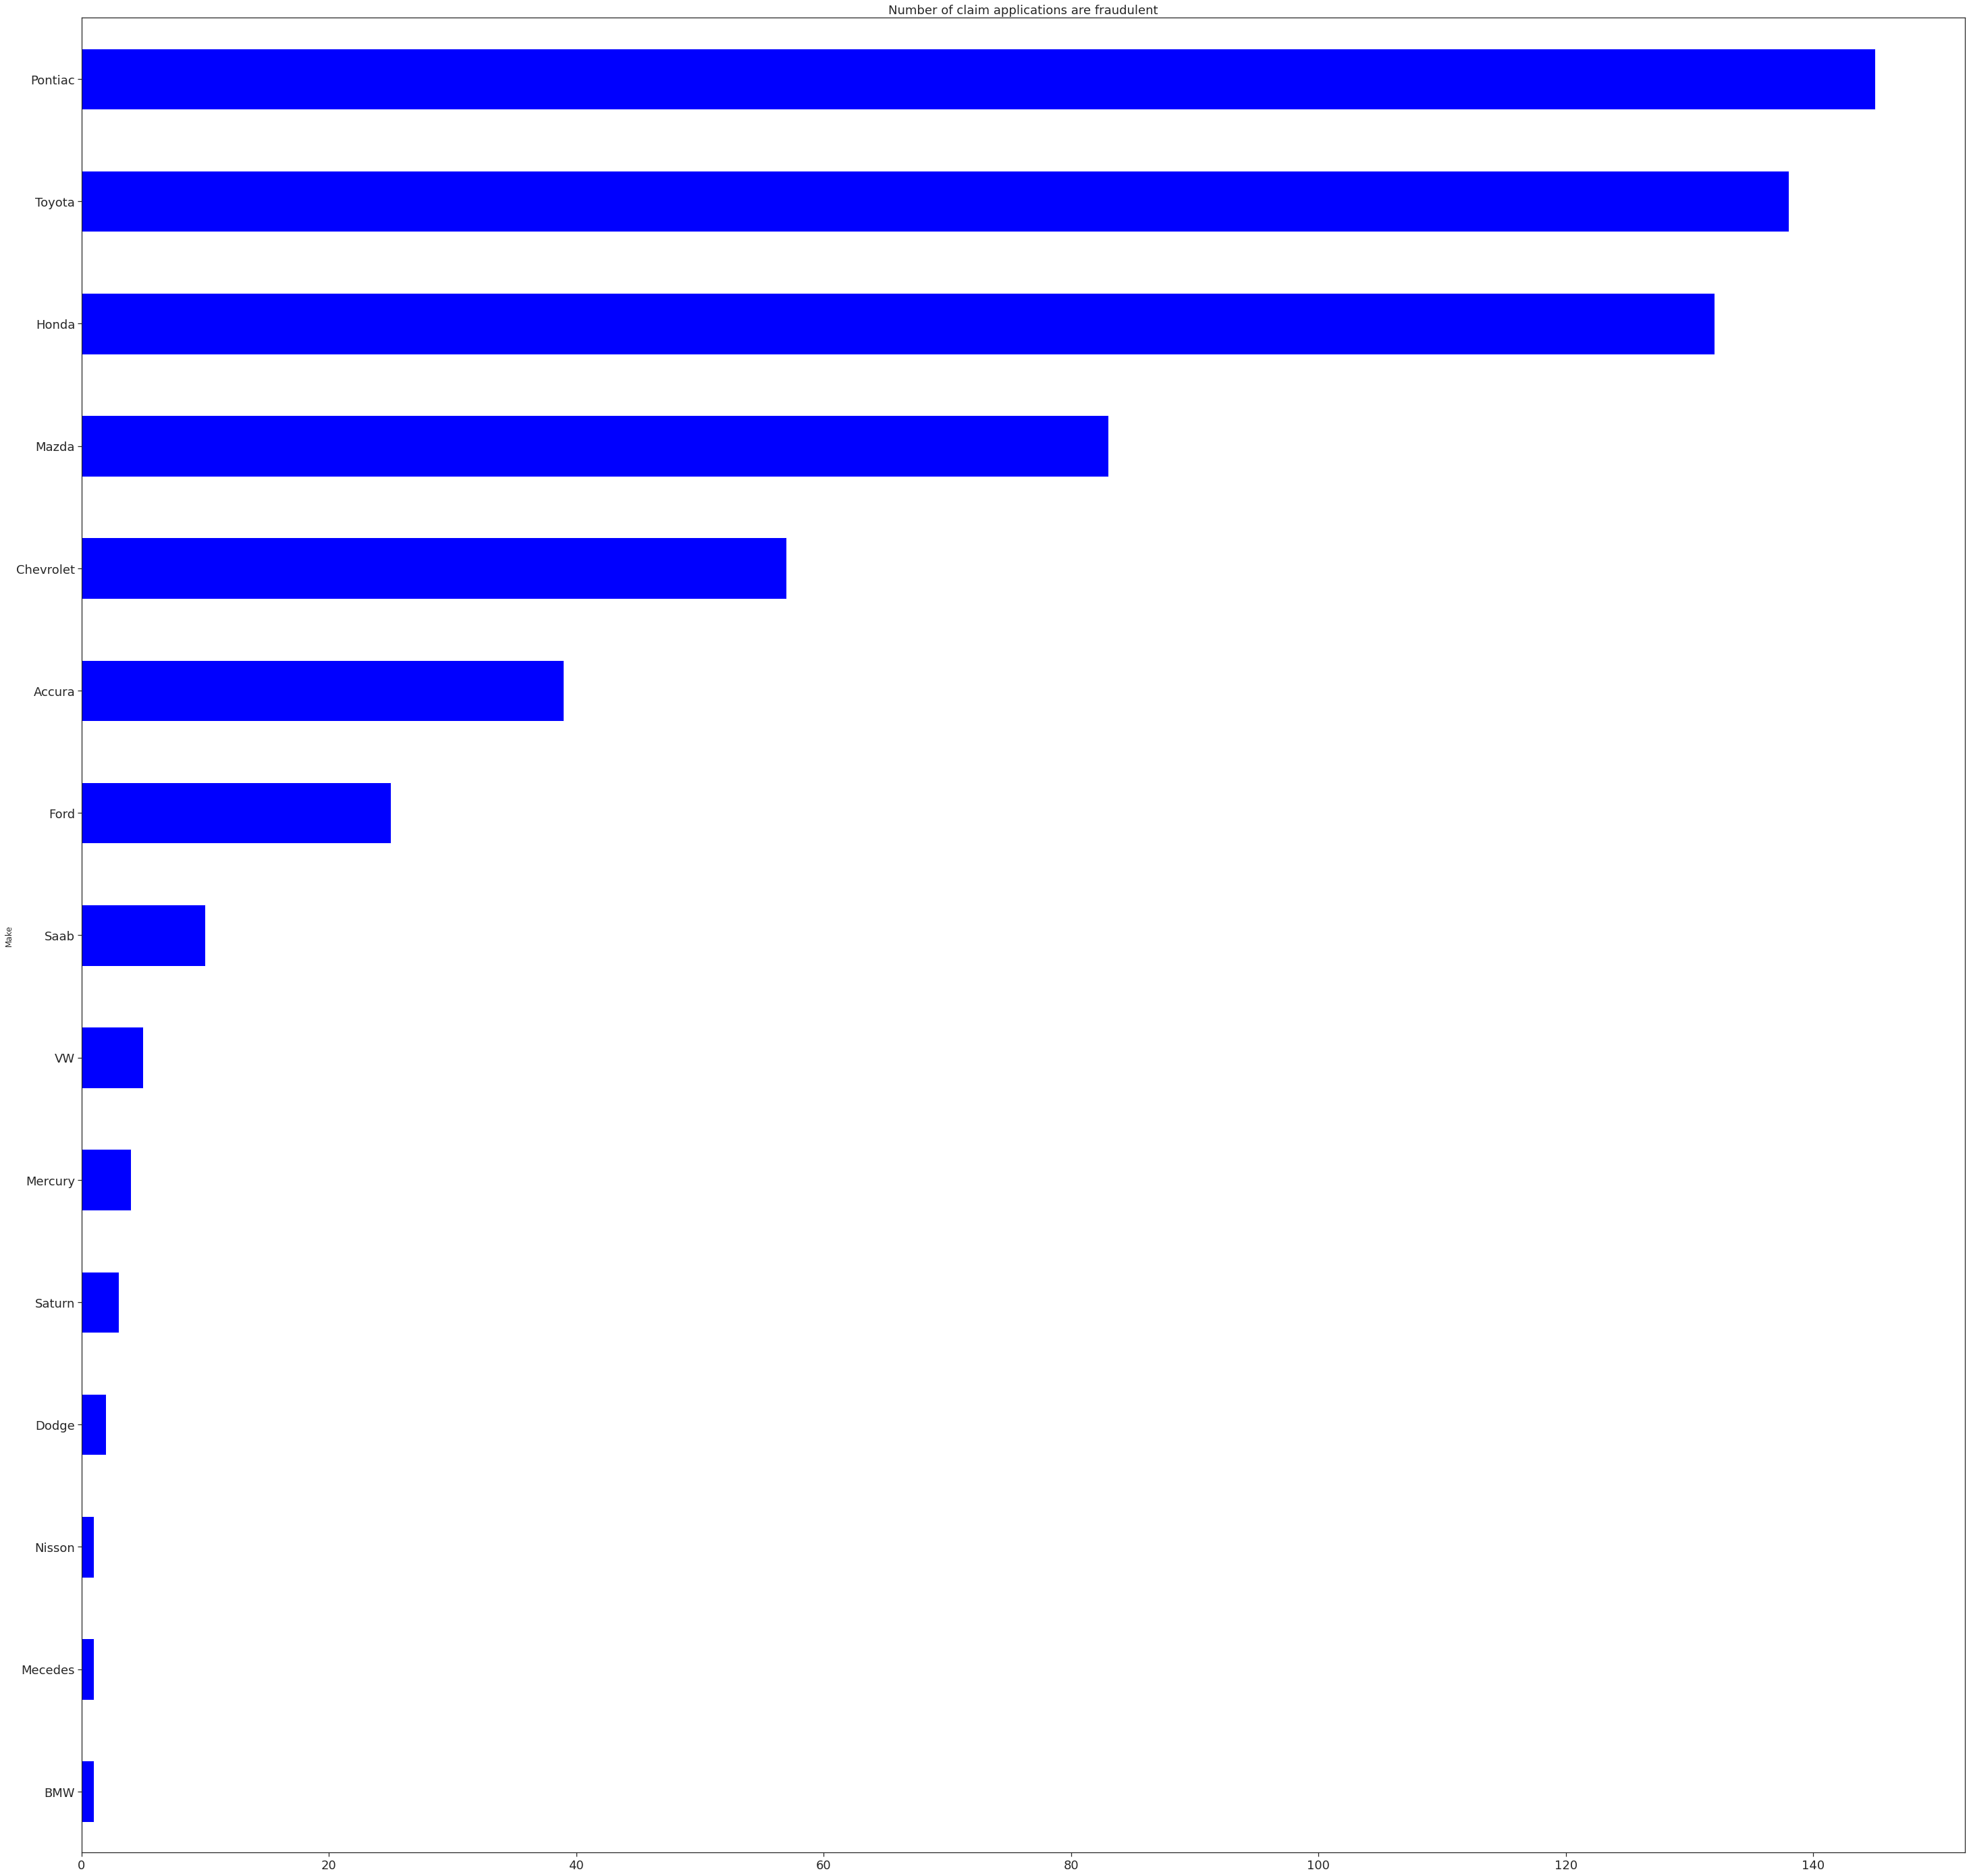

In [74]:
fig = plt.figure(figsize=(50,50))
data[data['FraudFound_P'] == 1].groupby(
    'Make')['FraudFound_P'].count().sort_values().plot(kind='barh',fontsize=18, color="blue")

plt.title('Number of claim applications are fraudulent', fontsize=18)

<font size="4">**2.6 Encoding Categorical and Standardizing Numeric Variables**</font>

In [219]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
def encoding (data):
  #Ordinal Encode
  ordinal_encoder = OrdinalEncoder()
  data_ordinal = ['Month','DayOfWeek','DayOfWeekClaimed','MonthClaimed',
                 'VehiclePrice','Days_Policy_Accident','Days_Policy_Claim',
                 'PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','NumberOfSuppliments',
                 'AddressChange_Claim','NumberOfCars']
  data[data_ordinal] = ordinal_encoder.fit_transform(data[data_ordinal])
  
  #Label Encode
  data_cat_label = data[['AccidentArea','Sex','Fault','PoliceReportFiled','WitnessPresent','AgentType','Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy']]
  label_encoder = preprocessing.LabelEncoder()
  for i in  data_cat_label:
    data[i] = label_encoder.fit_transform(data[i])


  
#numeric
  min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
  data_num = ['WeekOfMonth','WeekOfMonthClaimed','Age','Deductible','DriverRating',
              'Month','DayOfWeek','DayOfWeekClaimed','MonthClaimed','VehiclePrice','Days_Policy_Accident','Days_Policy_Claim',
                 'PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','NumberOfSuppliments',
                 'AddressChange_Claim','NumberOfCars']
  data[data_num] = min_max_scaler.fit_transform(data[data_num])

  return data                              

In [220]:
data_train = encoding(data_train)
data_val = encoding(data_val)
data_test = encoding(data_test)

In [197]:
data_train

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,-0.454545,0.0,1.000000,6,1,-0.428571,-0.333333,0.0,1,1,...,0.714286,0.25,0,0,0,1.000000,0.5,0.0,1995,1
1,0.454545,-0.5,-0.666667,17,1,0.714286,0.500000,-0.5,1,1,...,0.714286,0.75,0,0,0,-1.000000,0.5,-1.0,1996,1
2,-0.636364,-1.0,0.666667,17,1,-0.714286,-0.500000,-0.5,1,1,...,-0.142857,-0.25,0,0,0,-0.333333,0.5,-1.0,1994,2
3,-1.000000,-1.0,-0.333333,9,1,1.000000,-0.833333,-1.0,1,2,...,0.142857,0.00,0,0,0,0.333333,0.5,-1.0,1994,1
4,0.272727,0.5,1.000000,3,1,-0.714286,0.333333,0.5,1,1,...,0.714286,0.50,0,0,0,-1.000000,0.5,-1.0,1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10789,-0.636364,0.5,0.333333,6,1,-0.714286,-0.500000,0.5,1,1,...,0.428571,0.75,0,0,0,0.333333,0.5,-1.0,1994,0
10790,-1.000000,-1.0,0.333333,2,1,-0.428571,-0.833333,-0.5,1,2,...,0.428571,0.50,0,0,0,-0.333333,0.0,0.0,1995,0
10791,-0.818182,-1.0,-0.333333,2,0,1.000000,-0.666667,-0.5,1,1,...,0.428571,0.50,0,0,0,-1.000000,0.5,-1.0,1995,2
10792,-1.000000,0.0,-0.333333,6,1,0.428571,-0.833333,0.0,0,2,...,-0.142857,0.00,0,0,0,0.333333,0.5,-1.0,1996,1


<font size="4">**2.7 Outlier Detection**</font>

In [198]:
from numpy import where
def outlier (data):
  iforest = IsolationForest(n_estimators=100, random_state=42, contamination=0.02)
  pred = iforest.fit_predict(data)
  score = iforest.decision_function(data)
  anom_index = where(pred==-1)
  values = data.iloc[anom_index]
  data = data[~data.index.isin(values.index)]
  return data  

In [199]:
data_train = outlier(data_train)
data_val = outlier(data_val)
data_test = outlier(data_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [200]:
data_train

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,-0.454545,0.0,1.000000,6,1,-0.428571,-0.333333,0.0,1,1,...,0.714286,0.25,0,0,0,1.000000,0.5,0.0,1995,1
1,0.454545,-0.5,-0.666667,17,1,0.714286,0.500000,-0.5,1,1,...,0.714286,0.75,0,0,0,-1.000000,0.5,-1.0,1996,1
2,-0.636364,-1.0,0.666667,17,1,-0.714286,-0.500000,-0.5,1,1,...,-0.142857,-0.25,0,0,0,-0.333333,0.5,-1.0,1994,2
3,-1.000000,-1.0,-0.333333,9,1,1.000000,-0.833333,-1.0,1,2,...,0.142857,0.00,0,0,0,0.333333,0.5,-1.0,1994,1
4,0.272727,0.5,1.000000,3,1,-0.714286,0.333333,0.5,1,1,...,0.714286,0.50,0,0,0,-1.000000,0.5,-1.0,1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10788,0.272727,-0.5,-1.000000,9,1,-0.428571,0.333333,0.0,1,1,...,0.428571,0.00,0,0,0,1.000000,0.5,-1.0,1994,2
10789,-0.636364,0.5,0.333333,6,1,-0.714286,-0.500000,0.5,1,1,...,0.428571,0.75,0,0,0,0.333333,0.5,-1.0,1994,0
10791,-0.818182,-1.0,-0.333333,2,0,1.000000,-0.666667,-0.5,1,1,...,0.428571,0.50,0,0,0,-1.000000,0.5,-1.0,1995,2
10792,-1.000000,0.0,-0.333333,6,1,0.428571,-0.833333,0.0,0,2,...,-0.142857,0.00,0,0,0,0.333333,0.5,-1.0,1996,1


<font size="4">**2.8 Final train, test and validation dataset**</font>

In [201]:

data_train.to_csv("Fraud_train.csv")



data_test.to_csv("Fraud_test.csv")


data_val.to_csv("Fraud_val.csv")

<font size="5">**3. Feature Selection**</font>

In [202]:
X_train = data_train.drop(columns = ['FraudFound_P'])
y_train = data_train['FraudFound_P']

In [203]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=5)
forest_reg.fit(X_train,y_train)

features = pd.DataFrame(list(zip(X_train.columns,forest_reg.feature_importances_)), columns = ['predictor', 'feature importance']).sort_values(ascending=False, by = 'feature importance')
features

,predictor,feature importance
15,PolicyNumber,0.209634
10,Age,0.080486
0,Month,0.075634
6,MonthClaimed,0.067922
16,RepNumber,0.061162
3,Make,0.043088
2,DayOfWeek,0.040914
5,DayOfWeekClaimed,0.037951
1,WeekOfMonth,0.031455
7,WeekOfMonthClaimed,0.031010


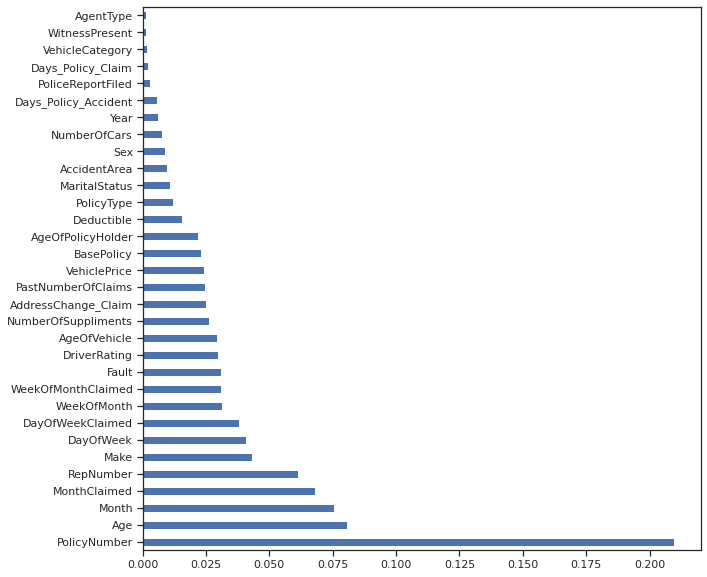

In [204]:
features = pd.Series(forest_reg.feature_importances_, index=X_train.columns)
features.nlargest(33).plot(kind='barh',figsize=(10,10))
plt.show()

In [221]:
##removing useless predictors

X_train = X_train.drop(columns = ["AgentType"])
X_test = X_test.drop(columns = ["AgentType"])

3.2 Dealing with imbalanced data

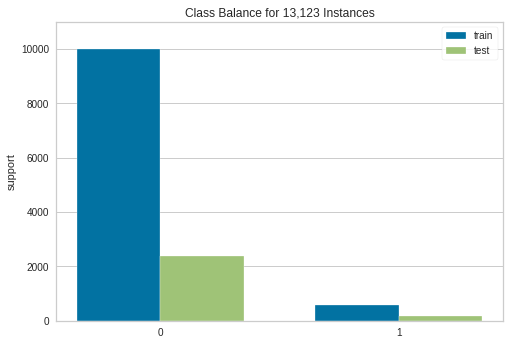

In [222]:
from yellowbrick.target import ClassBalance

# Instantiate the visualizer
visualizer = ClassBalance(labels=["0", "1"])

visualizer.fit(y_train, y_test)        # Fit the data to the visualizer
visualizer.show()

In [227]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=5)
X_train_smoteen, y_train_smoteen = smote_enn.fit_resample(X_train, y_train)

sampledtrain_dataset = pd.merge(X_train_smoteen, y_train_smoteen, left_index=True, right_index=True)
sampledtrain_dataset.to_csv("Fraud_sampledtrain.csv")

In [228]:
sampledtrain_dataset

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,FraudFound_P
0,0.454545,-0.500000,-0.666667,17,1,0.714286,0.500000,-0.500000,1,1,...,0.714286,0.750000,0,0,-1.000000,0.5,-1.0,1996,1,0
1,-0.636364,-1.000000,0.666667,17,1,-0.714286,-0.500000,-0.500000,1,1,...,-0.142857,-0.250000,0,0,-0.333333,0.5,-1.0,1994,2,0
2,-0.636364,-1.000000,0.000000,9,1,-0.428571,-0.500000,0.000000,1,1,...,0.142857,0.000000,0,0,-1.000000,0.5,-1.0,1994,1,0
3,-0.818182,-0.500000,0.000000,6,1,-0.428571,1.000000,0.500000,1,2,...,-0.142857,-0.250000,0,0,1.000000,0.0,-0.5,1996,2,0
4,0.818182,0.500000,0.666667,2,1,1.000000,0.833333,0.500000,1,1,...,0.142857,0.250000,0,0,-1.000000,0.5,-1.0,1995,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11615,0.818182,0.000000,0.666667,13,1,-0.139737,0.833333,0.332423,1,1,...,0.618528,0.582423,0,0,0.776565,0.5,-1.0,1995,0,1
11616,-0.636364,-0.500000,-0.435537,11,0,-0.428571,-0.448898,0.000000,1,1,...,0.011453,0.596695,0,0,1.000000,0.5,-1.0,1995,0,1
11617,0.272727,0.623952,0.247903,4,1,1.000000,-0.833333,-1.000000,0,2,...,0.213687,0.061976,0,0,0.504193,0.5,-1.0,1995,0,1
11618,0.454545,0.000000,0.718496,13,1,-0.206447,0.077743,-0.766770,1,1,...,0.428571,0.211128,0,0,-0.436991,0.5,-1.0,1996,0,1
